# Data mining with python

### Contents:
1. Import Necessary Libraries
2. Read In and Explore the Data
3. Data Analysis
4. Data Visualization
5. Cleaning Data
6. Using ML Models

## 1. import necessary library

In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import graphviz
from sklearn import tree, metrics


# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

## 2. Read In and Explore the Data

In [3]:
# get titanic & test csv files as a DataFrame
df = pd.read_csv("./titanic_data_set/train.csv")

# preview the data
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## 3. Data Analysis

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
86,87,0,3,"Ford, Mr. William Neal",male,16.0,1,3,W./C. 6608,34.3750,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


* **Numerical Features:** Age (Continuous), Fare (Continuous), SibSp (Discrete), Parch (Discrete)
* **Categorical Features:** Survived, Sex, Embarked, Pclass
* **Alphanumeric Features:** Ticket, Cabin

## 4. Data Visualization

### Pclass Feature

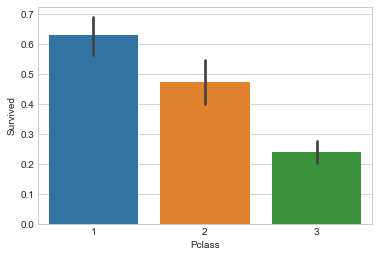

In [8]:
sns.barplot(df['Pclass'], df['Survived'], data=df)

### Sex Feature

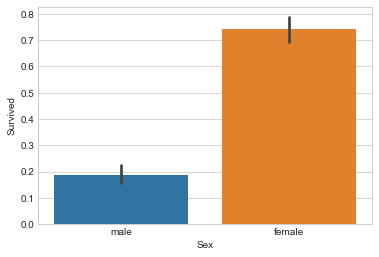

In [10]:
sns.barplot(df['Sex'], df['Survived'], data=df)

### Age Feature

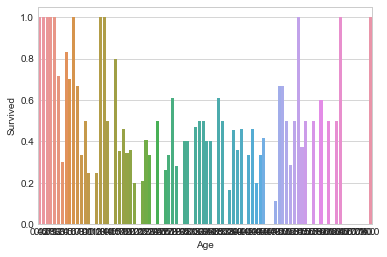

In [14]:
sns.barplot(df['Age'], df['Survived'], data=df, ci=5)

### SibSp Feature

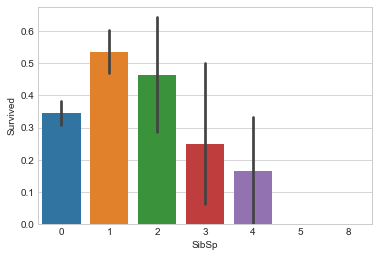

In [8]:
sns.barplot(df['SibSp'], df['Survived'], data=df)

### Parch Feature

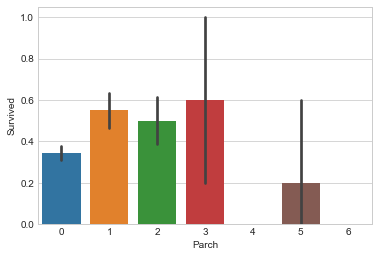

In [9]:
sns.barplot(df['Parch'], df['Survived'], data=df)

### Fare Feature

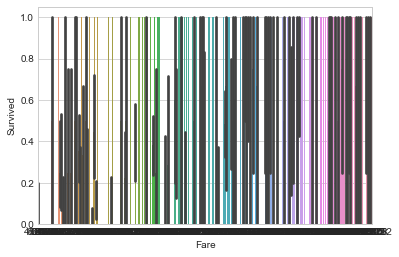

In [10]:
sns.barplot(df['Fare'], df['Survived'], data=df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## 5. Cleaning Data

### show info to find null values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


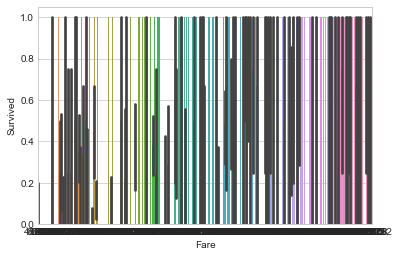

In [13]:
sns.barplot(df['Fare'], df['Survived'], data=df)

### Ok, Cabin column has too many null values, so

### drop unnecessary columns

In [14]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
df = df.drop(['PassengerId','Name','Ticket', 'Embarked', 'Cabin'], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


### Sex : male = 1, female = 0
### change 'Sex' column to binary

In [15]:
df.Sex = (df.Sex.values == 'male').astype(int)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [16]:
mean_age = np.mean(df.Age)
df = df.fillna({'Age': mean_age})

### convert continuous variable to a categorical variable
### in this case, convert age and fare

In [17]:
df.Age = pd.cut(df.Age, 4, labels=[0, 1, 2, 3])
df.Fare = pd.cut(df.Fare, 3, labels=[0, 1, 2])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,1,1,0,0
1,1,1,0,1,1,0,0
2,1,3,0,1,0,0,0
3,1,1,0,1,1,0,0
4,0,3,1,1,0,0,0


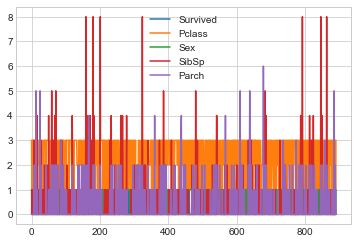

In [18]:
df.plot()
plt.show()

## 6. Using ML Models

### split data

In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train = X.loc[0:701]
X_test = X.loc[701:]
y_train = y.loc[0:701]
y_test = y.loc[701:]

In [20]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,1,1,0,0
1,1,0,1,1,0,0
2,3,0,1,0,0,0
3,1,0,1,1,0,0
4,3,1,1,0,0,0


In [21]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [22]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare
701,1,1,1,0,0,0
702,3,0,0,0,1,0
703,3,1,1,0,0,0
704,3,1,1,1,0,0
705,2,1,1,0,0,0


In [23]:
y_test.head()

701    1
702    0
703    0
704    0
705    0
Name: Survived, dtype: int64

### fit data in decision tree

In [24]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
Pclass    702 non-null int64
Sex       702 non-null int32
Age       702 non-null category
SibSp     702 non-null int64
Parch     702 non-null int64
Fare      702 non-null category
dtypes: category(2), int32(1), int64(3)
memory usage: 20.9 KB


In [25]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 701 to 890
Data columns (total 6 columns):
Pclass    190 non-null int64
Sex       190 non-null int32
Age       190 non-null category
SibSp     190 non-null int64
Parch     190 non-null int64
Fare      190 non-null category
dtypes: category(2), int32(1), int64(3)
memory usage: 5.9 KB


In [26]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
y_pred = classifier.predict(X_test)

### confusion matrix

In [28]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('\nprecision = ' + str((cm[0][0] + cm[1][1])/ (cm[0][1] + cm[1][0] + cm[0][0] + cm[1][1])))

[[110  10]
 [ 21  49]]

precision = 0.8368421052631579


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.1631578947368421
Mean Squared Error: 0.1631578947368421
Root Mean Squared Error: 0.4039280811442083


In [30]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.84      0.92      0.88       120
          1       0.83      0.70      0.76        70

avg / total       0.84      0.84      0.83       190



In [31]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [32]:
X_train.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

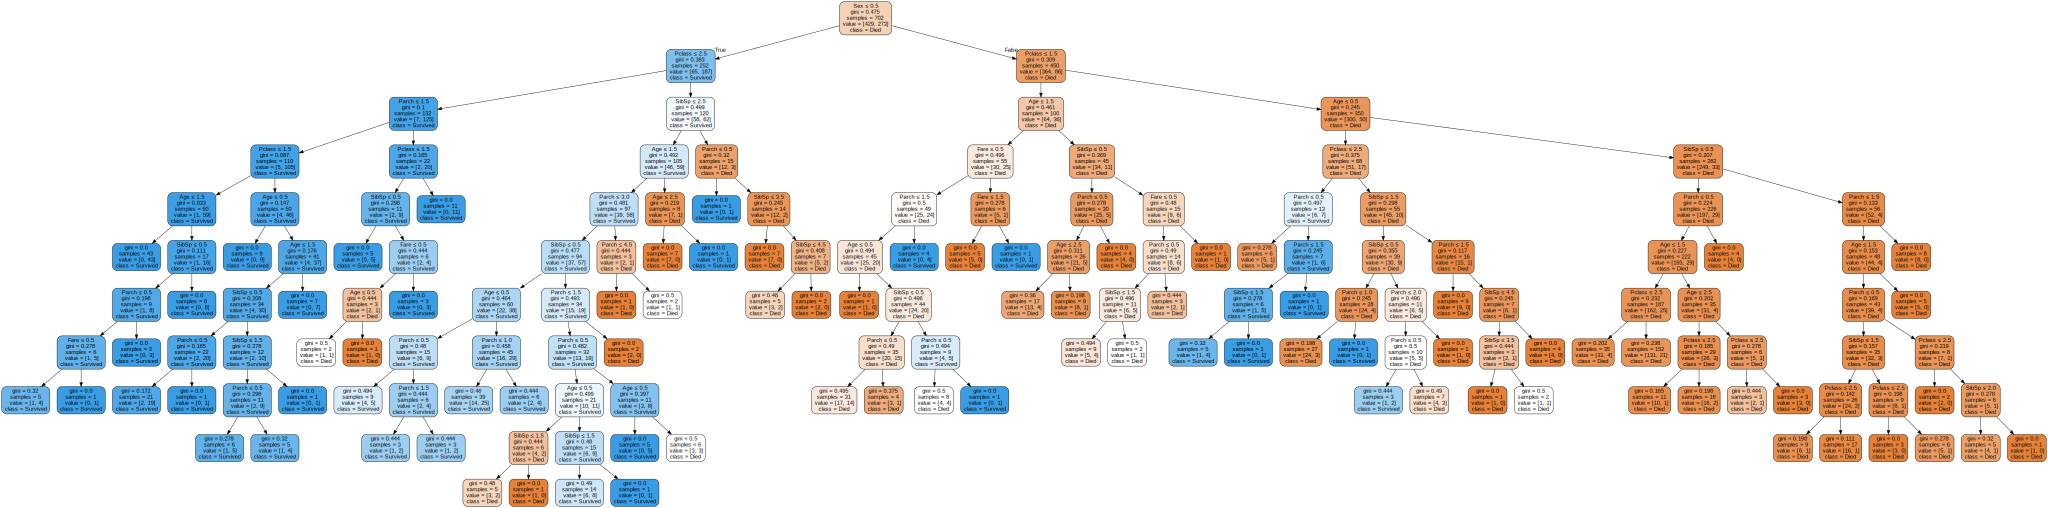

In [33]:
dot_data = tree.export_graphviz(clf, out_file=None,
                         feature_names=X_train.columns,
                         class_names=['Died', 'Survived'],
                         filled=True, rounded=True,
                         special_characters=True)
graph = graphviz.Source(dot_data)  
graph.render("graphviz") 
graph


### KNN

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))


0.8205128205128205
0.8263157894736842


##### 